# Proyek Analisis Data: Rental Sepeda
- **Nama:** Arjuna Dwi Damara Putra
- **Email:** arjuna.dwi.damara.putra.tik22@mhsw.pnj.ac.id
- **ID Dicoding:** arjuna_dwi

## Menentukan Pertanyaan 

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Seberapa besar peran suhu terasa (atemp) dan musim dalam memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nomou\AppData\Local\Temp\ipykernel_2504\2625543561.py:1: SyntaxWarning: invalid escape sequence '\d'
  day_df = pd.read_csv("data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\nomou\AppData\Local\Temp\ipykernel_2504\1550626864.py:1: SyntaxWarning: invalid escape sequence '\h'
  hour_df = pd.read_csv("data\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### DAY.CSV

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### HOUR.CSV

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
DataFrame "day" dan "hour" tidak ada nilai yang missing

### Cleaning Data

In [10]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [11]:
print('day_df["dteday"] : ', day_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]


**Insight:**
Memperbaiki Tipe Data


## Exploratory Data Analysis (EDA)

### Deskripsi Data

##### DAY

In [12]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


##### HOUR

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Visualization & Explanatory Analysis

### Hubungan sewa sepeda dengan kondisi cuaca

C:\Users\nomou\AppData\Local\Temp\ipykernel_2504\3320496445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='weather_label', y='cnt', data=day_df, palette='coolwarm')


Text(0, 0.5, 'Jumlah Penyewaan Sepeda')

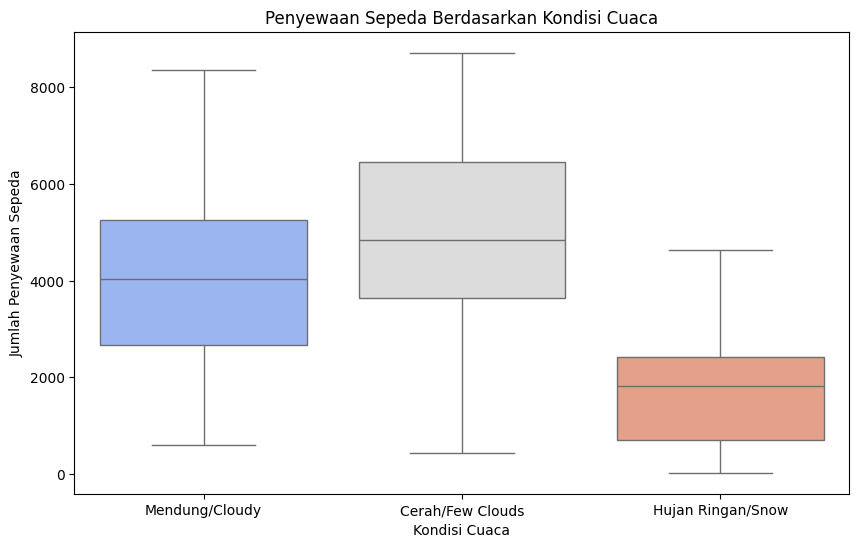

In [14]:
weather_labels = {
    1: 'Cerah/Few Clouds',
    2: 'Mendung/Cloudy',
    3: 'Hujan Ringan/Snow'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_labels)

plt.figure(figsize=(10, 6))
sn.boxplot(x='weather_label', y='cnt', data=day_df, palette='coolwarm')
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')

### Hubungan sewa sepeda dengan musim

C:\Users\nomou\AppData\Local\Temp\ipykernel_2504\3509350460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='season_label', y='cnt', data=day_df, palette='coolwarm')


Text(0, 0.5, 'Jumlah Penyewaan Sepeda')

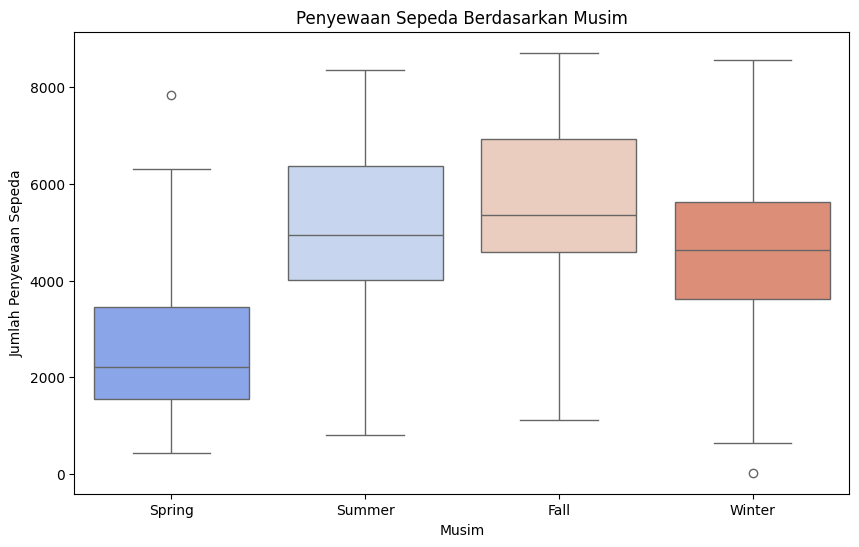

In [15]:
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_labels)

plt.figure(figsize=(10, 6))
sn.boxplot(x='season_label', y='cnt', data=day_df, palette='coolwarm')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?


In [16]:
weather_rental_mean = day_df.groupby('weathersit')['cnt'].mean()

C:\Users\nomou\AppData\Local\Temp\ipykernel_2504\3358346742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=weather_rental_mean.index, y=weather_rental_mean.values, palette='coolwarm')


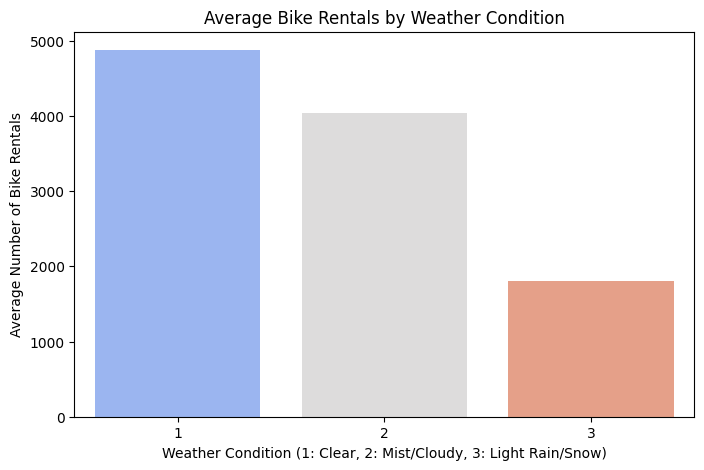

In [17]:
plt.figure(figsize=(8,5))
sn.barplot(x=weather_rental_mean.index, y=weather_rental_mean.values, palette='coolwarm')
plt.title("Average Bike Rentals by Weather Condition")
plt.xlabel("Weather Condition (1: Clear, 2: Mist/Cloudy, 3: Light Rain/Snow)")
plt.ylabel("Average Number of Bike Rentals")
plt.show()

**Insight:**
Semakin cerah cuaca semakin banyak sepeda yang di sewa

### Pertanyaan 2: Seberapa besar peran suhu terasa (atemp) dalam memengaruhi jumlah penyewaan sepeda?

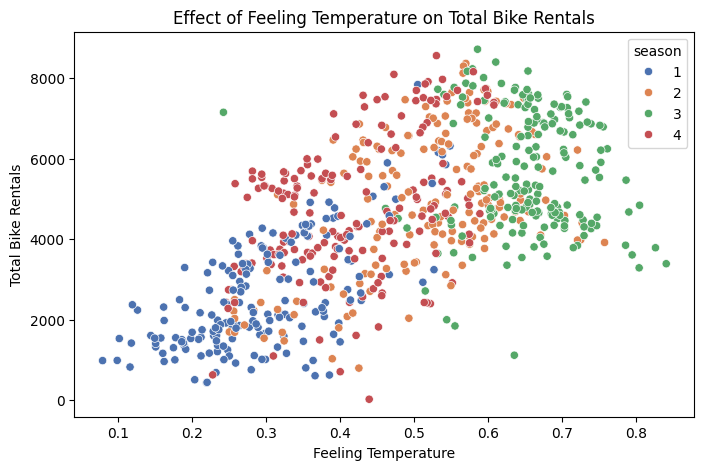

In [18]:
plt.figure(figsize=(8,5))
sn.scatterplot(x=day_df['atemp'], y=day_df['cnt'], hue=day_df['season'], palette='deep')
plt.title("Effect of Feeling Temperature on Total Bike Rentals")
plt.xlabel("Feeling Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

**Insight:**
Suhu terasa (atemp) memiliki peran besar dengan penyewaan sepeda

## Conclusion

Dari analisis yang dilakukan, terlihat bahwa baik kondisi cuaca maupun suhu terasa (atemp) memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.

- #### Pengaruh Cuaca:
    Cuaca cerah terbukti menjadi faktor utama yang mendorong peningkatan jumlah penyewaan sepeda. Ketika cuaca cerah, individu cenderung lebih memilih untuk beraktivitas di luar ruangan, termasuk bersepeda. Paparan sinar matahari yang menyenangkan dan suasana yang nyaman berkontribusi pada meningkatnya minat masyarakat untuk menggunakan sepeda sebagai moda transportasi atau kegiatan rekreasi.

- #### Pengaruh Suhu Terasa (atemp):
    Suhu terasa juga memainkan peran penting dalam keputusan penyewaan sepeda. Rentang suhu yang nyaman, biasanya antara 20°C hingga 30°C, meningkatkan keinginan individu untuk bersepeda. Data menunjukkan adanya korelasi positif antara suhu terasa dan jumlah penyewaan sepeda; semakin nyaman suhu, semakin tinggi jumlah penyewaan yang terjadi.

- #### Interaksi Antara Cuaca dan Suhu:
    Kedua faktor ini saling berinteraksi. Hari-hari dengan cuaca cerah dan suhu yang nyaman cenderung menciptakan lingkungan yang ideal untuk bersepeda, sehingga memaksimalkan jumlah penyewaan. Sebaliknya, kondisi cuaca yang buruk atau suhu yang ekstrem dapat mengurangi minat masyarakat untuk bersepeda, menurunkan angka penyewaan secara signifikan.

## Rekomendasi :

Berdasarkan temuan ini, pengelola layanan penyewaan sepeda disarankan untuk memanfaatkan informasi tentang cuaca dan suhu dalam merencanakan strategi pemasaran dan operasional. Misalnya, dengan menawarkan promosi khusus pada hari-hari dengan cuaca cerah dan suhu nyaman, serta menyesuaikan jumlah sepeda yang tersedia berdasarkan prakiraan cuaca. Dengan pendekatan ini, diharapkan dapat meningkatkan kepuasan pelanggan dan jumlah penyewaan sepeda secara keseluruhan.